In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    print("Not running in Colab, skipping Google Drive mount.")

Mounted at /content/drive


Real sample: sample_00268
Fake sample: sample_00964

✓ Saved spectrogram comparison → /content/drive/MyDrive/FakeAVCeleb/poster_images/audio_spectrogram_comparison.png


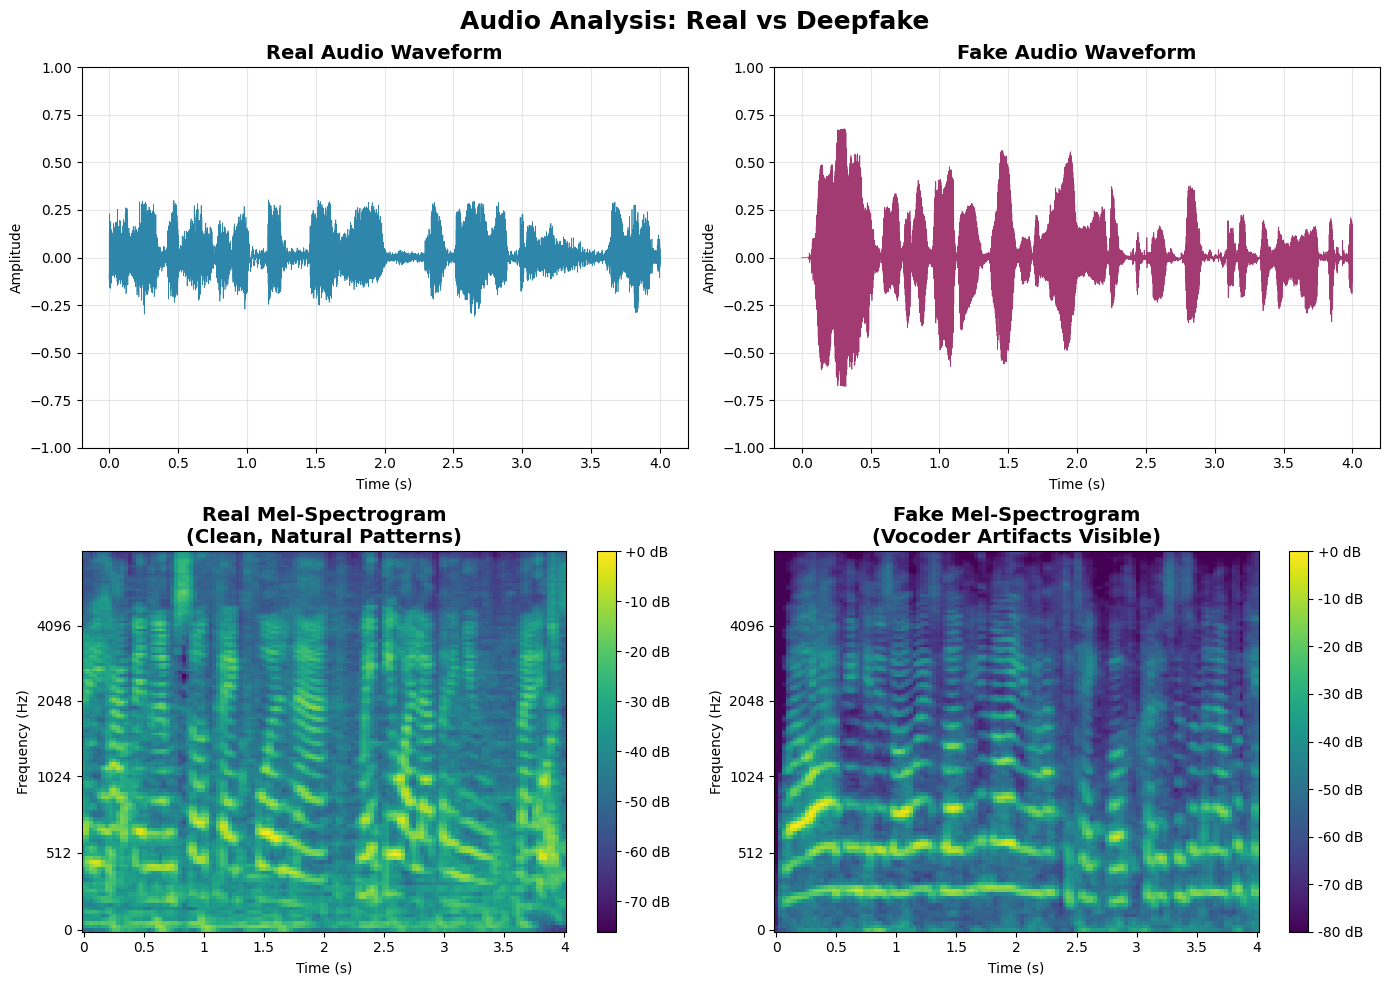

/tmp/ipython-input-4033983584.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Saved poster version → /content/drive/MyDrive/FakeAVCeleb/poster_images/audio_spectrogram_poster.png


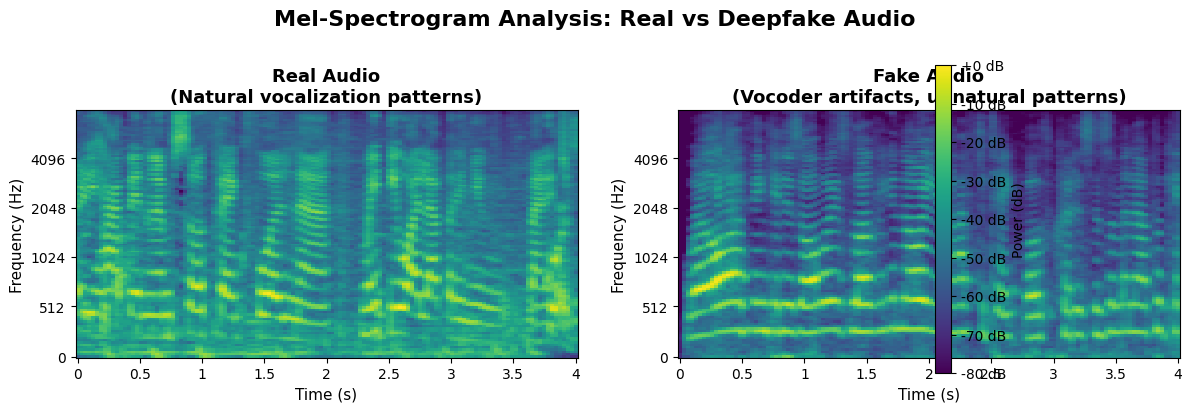


📊 Generating additional examples...
✓ Saved multiple examples → /content/drive/MyDrive/FakeAVCeleb/poster_images/audio_spectrogram_multiple.png


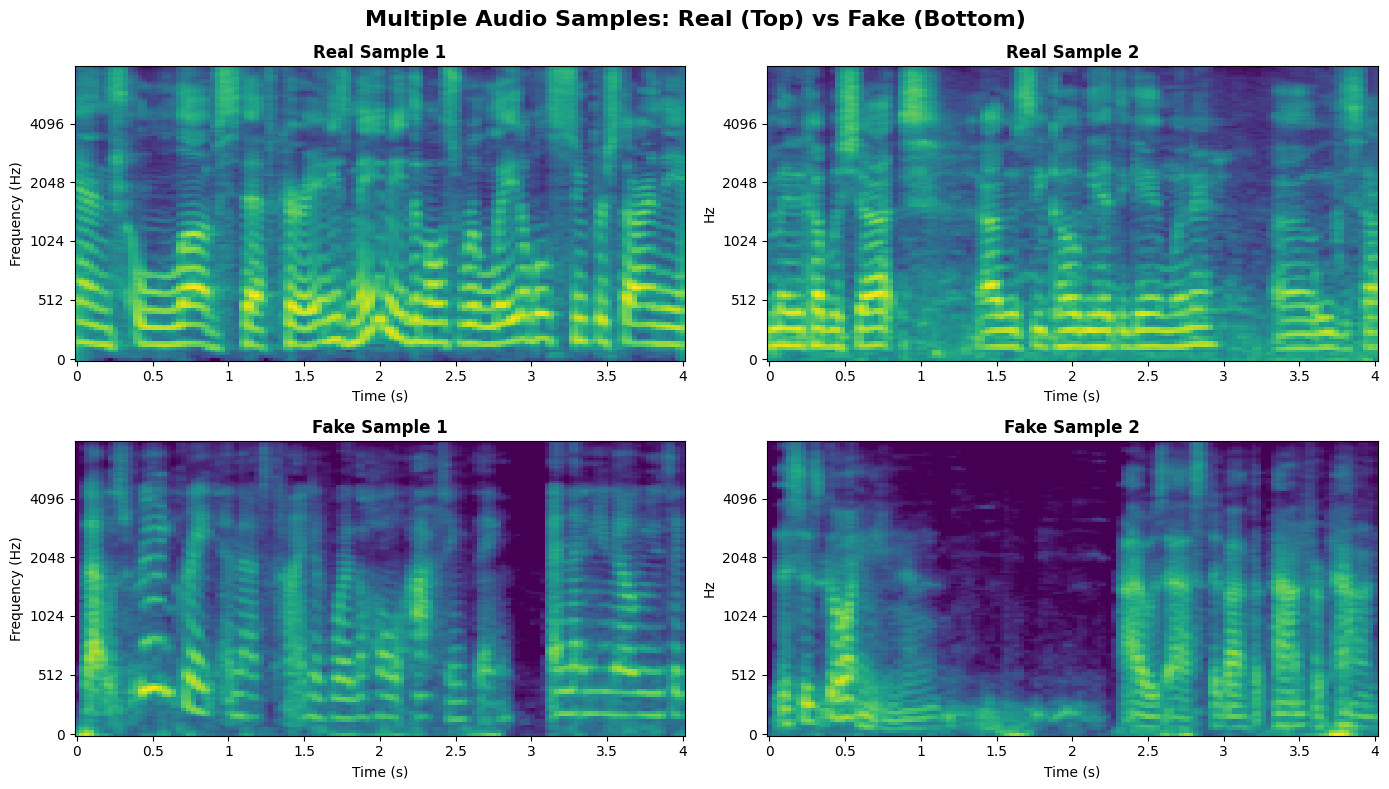


 All images saved to: /content/drive/MyDrive/FakeAVCeleb/poster_images

Generated files:
  1. audio_spectrogram_comparison.png (full with waveforms)
  2. audio_spectrogram_poster.png (simplified for poster)
  3. audio_spectrogram_multiple.png (multiple examples)


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Generate Real vs Fake Audio Spectrogram Comparison for Poster
No training required - just visualization
"""

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== PATHS =====================
BASE_DIR = Path('/content/drive/MyDrive/FakeAVCeleb')
TEST_CSV = BASE_DIR / 'test_fixed_fullschema_hashsplit.csv'
AUDIO_ROOT = BASE_DIR / 'audio_wav'
OUTPUT_DIR = BASE_DIR / 'poster_images'

OUTPUT_DIR.mkdir(exist_ok=True)

# ===================== CONFIG ====================
SAMPLE_RATE = 16000
N_MELS = 128
N_FFT = 2048
HOP_LENGTH = 512
DURATION = 4.0  # seconds

# =============== LOAD DATASET ====================
df = pd.read_csv(TEST_CSV)

# Get one real and one fake sample
real_sample = df[df['audio_fake'] == 0].iloc[0]
fake_sample = df[df['audio_fake'] == 1].iloc[0]

print(f"Real sample: {real_sample['sample_id']}")
print(f"Fake sample: {fake_sample['sample_id']}")

# ============= GENERATE SPECTROGRAMS =============
def load_and_process_audio(sample_id, audio_root, sr=SAMPLE_RATE, duration=DURATION):
    """Load audio and generate mel spectrogram"""
    wav_path = audio_root / f"{sample_id}.wav"
    y, _ = librosa.load(wav_path, sr=sr, duration=duration)

    # Generate mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=y, sr=sr, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

    return y, mel_spec_db

# Load real and fake audio
real_audio, real_spec = load_and_process_audio(real_sample['sample_id'], AUDIO_ROOT)
fake_audio, fake_spec = load_and_process_audio(fake_sample['sample_id'], AUDIO_ROOT)

# ============= CREATE VISUALIZATION ==============
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Audio Analysis: Real vs Deepfake', fontsize=18, fontweight='bold', y=0.98)

# Color scheme
cmap = 'viridis'

# Real audio waveform
axes[0, 0].plot(np.linspace(0, DURATION, len(real_audio)), real_audio, color='#2E86AB', linewidth=0.5)
axes[0, 0].set_title('Real Audio Waveform', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_ylim(-1, 1)
axes[0, 0].grid(True, alpha=0.3)

# Fake audio waveform
axes[0, 1].plot(np.linspace(0, DURATION, len(fake_audio)), fake_audio, color='#A23B72', linewidth=0.5)
axes[0, 1].set_title('Fake Audio Waveform', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_ylim(-1, 1)
axes[0, 1].grid(True, alpha=0.3)

# Real mel spectrogram
img1 = librosa.display.specshow(
    real_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
    x_axis='time', y_axis='mel', cmap=cmap, ax=axes[1, 0]
)
axes[1, 0].set_title('Real Mel-Spectrogram\n(Clean, Natural Patterns)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Frequency (Hz)')
fig.colorbar(img1, ax=axes[1, 0], format='%+2.0f dB')

# Fake mel spectrogram
img2 = librosa.display.specshow(
    fake_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
    x_axis='time', y_axis='mel', cmap=cmap, ax=axes[1, 1]
)
axes[1, 1].set_title('Fake Mel-Spectrogram\n(Vocoder Artifacts Visible)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Frequency (Hz)')
fig.colorbar(img2, ax=axes[1, 1], format='%+2.0f dB')

plt.tight_layout()

# Save the figure
output_path = OUTPUT_DIR / 'audio_spectrogram_comparison.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"\n✓ Saved spectrogram comparison → {output_path}")

plt.show()

# ========== CREATE SIMPLIFIED VERSION FOR POSTER ==========
# Just spectrograms side-by-side, no waveforms
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4))
fig2.suptitle('Mel-Spectrogram Analysis: Real vs Deepfake Audio',
              fontsize=16, fontweight='bold', y=1.02)

# Real spectrogram
img1 = librosa.display.specshow(
    real_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
    x_axis='time', y_axis='mel', cmap=cmap, ax=axes2[0]
)
axes2[0].set_title('Real Audio\n(Natural vocalization patterns)', fontsize=13, fontweight='bold')
axes2[0].set_xlabel('Time (s)', fontsize=11)
axes2[0].set_ylabel('Frequency (Hz)', fontsize=11)

# Fake spectrogram
img2 = librosa.display.specshow(
    fake_spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
    x_axis='time', y_axis='mel', cmap=cmap, ax=axes2[1]
)
axes2[1].set_title('Fake Audio\n(Vocoder artifacts, unnatural patterns)', fontsize=13, fontweight='bold')
axes2[1].set_xlabel('Time (s)', fontsize=11)
axes2[1].set_ylabel('Frequency (Hz)', fontsize=11)

# Shared colorbar
fig2.colorbar(img2, ax=axes2, format='%+2.0f dB', label='Power (dB)')

plt.tight_layout()

# Save simplified version
output_path_simple = OUTPUT_DIR / 'audio_spectrogram_poster.png'
plt.savefig(output_path_simple, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Saved poster version → {output_path_simple}")

plt.show()

# ========== CREATE MULTIPLE EXAMPLES ==========
print("\n Generating additional examples...")

# Get 2 more real and 2 more fake samples
real_samples = df[df['audio_fake'] == 0].sample(n=2, random_state=42)
fake_samples = df[df['audio_fake'] == 1].sample(n=2, random_state=42)

fig3, axes3 = plt.subplots(2, 2, figsize=(14, 8))
fig3.suptitle('Multiple Audio Samples: Real (Top) vs Fake (Bottom)',
              fontsize=16, fontweight='bold')

for idx, (row, ax) in enumerate(zip(real_samples.iterrows(), axes3[0])):
    sample_id = row[1]['sample_id']
    _, spec = load_and_process_audio(sample_id, AUDIO_ROOT)
    librosa.display.specshow(spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
                            x_axis='time', y_axis='mel', cmap=cmap, ax=ax)
    ax.set_title(f'Real Sample {idx+1}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time (s)')
    if idx == 0:
        ax.set_ylabel('Frequency (Hz)')

for idx, (row, ax) in enumerate(zip(fake_samples.iterrows(), axes3[1])):
    sample_id = row[1]['sample_id']
    _, spec = load_and_process_audio(sample_id, AUDIO_ROOT)
    librosa.display.specshow(spec, sr=SAMPLE_RATE, hop_length=HOP_LENGTH,
                            x_axis='time', y_axis='mel', cmap=cmap, ax=ax)
    ax.set_title(f'Fake Sample {idx+1}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Time (s)')
    if idx == 0:
        ax.set_ylabel('Frequency (Hz)')

plt.tight_layout()

output_path_multi = OUTPUT_DIR / 'audio_spectrogram_multiple.png'
plt.savefig(output_path_multi, dpi=300, bbox_inches='tight', facecolor='white')
print(f"✓ Saved multiple examples → {output_path_multi}")

plt.show()

print(f"\n All images saved to: {OUTPUT_DIR}")
print("\nGenerated files:")
print(f"  1. audio_spectrogram_comparison.png (full with waveforms)")
print(f"  2. audio_spectrogram_poster.png (simplified for poster)")
print(f"  3. audio_spectrogram_multiple.png (multiple examples)")

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os, random
from datetime import datetime
from pathlib import Path

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import librosa

from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vgg19, VGG19_Weights
from tqdm import tqdm

# ======================= CONFIG =======================
DEVICE       = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# If hash-disjoint splits, use :
TRAIN_CSV    = '/content/drive/MyDrive/FakeAVCeleb/train_fixed_fullschema_hashsplit.csv'
TEST_CSV     = '/content/drive/MyDrive/FakeAVCeleb/test_fixed_fullschema_hashsplit.csv'
AUDIO_ROOT   = Path('/content/drive/MyDrive/FakeAVCeleb/audio_wav')

# Fresh cache for EVAL/TEST ONLY
CACHE_DIR    = Path('/content/drive/MyDrive/FakeAVCeleb/cache/audio_3ch_hashsplit_eval')

# Model/artifacts go next to your CSVs
MODEL_DIR    = Path(TRAIN_CSV).parent
BEST_WEIGHTS_PATH = MODEL_DIR / 'audio_vgg_3ch_best.pth'
FULL_MODEL_PATH   = MODEL_DIR / 'audio_vgg_3ch_full.pth'
CKPT_PATH         = MODEL_DIR / 'audio_vgg_3ch_ckpt.pth'
REPORT_PATH       = MODEL_DIR / 'audio_vgg_3ch_report.txt'

BATCH_SIZE   = 16
EPOCHS       = 10           # full training
LR           = 1e-4
WD           = 1e-5
GRAD_CLIP    = 1.0

SAMPLE_RATE  = 16000
N_MELS       = 128
N_MFCC       = 20
DURA_SEC     = 4.0
TARGET_LEN   = int(SAMPLE_RATE * DURA_SEC)

# Data & feature robustness knobs
RANDOM_CROP_TRAIN = True    # random 4s window during training
AUG_ENABLE  = True
AUG_PROB    = 0.7  # chance to apply audio/spec aug in train
AUG = dict(
    noise_p=0.5,            # Gaussian noise
    pitch_p=0.3,            # semitones in [-2, +2]
    speed_p=0.6,            # rate in [0.9, 1.1]
    resample_p=0.3,         # down→up sample (8–12 kHz → 16 kHz)
    gain_p=0.5,             # amplitude gain [0.8, 1.25]
)
SPEED_RANGE_TTA = (0.97, 1.03)  # tiny jitter used in optional TTA

# Repro
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if DEVICE.type == "cuda":
    torch.cuda.manual_seed_all(SEED)

os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(CACHE_DIR, exist_ok=True)

# ================== AUGMENT HELPERS ===================
def _pad_or_trim(y, target_len):
    if len(y) > target_len: return y[:target_len]
    if len(y) < target_len: return np.pad(y, (0, target_len - len(y)))
    return y

def audio_augment(y, sr):
    """Tempo/loudness/pitch/codec-ish robustness (train only)."""
    if not AUG_ENABLE or np.random.rand() > AUG_PROB:
        return y
    ops = ["noise","pitch","speed","resample","gain"]
    np.random.shuffle(ops)
    for op in ops:
        if op == "noise" and np.random.rand() < AUG["noise_p"]:
            y = y + 0.01 * np.random.randn(len(y))
        elif op == "pitch" and np.random.rand() < AUG["pitch_p"]:
            steps = np.random.uniform(-2.0, 2.0)
            y = librosa.effects.pitch_shift(y, n_steps=steps, sr=sr)
        elif op == "speed" and np.random.rand() < AUG["speed_p"]:
            rate = np.random.uniform(0.9, 1.1)
            z = librosa.effects.time_stretch(y, rate=rate)
            y = _pad_or_trim(z, len(y))
        elif op == "resample" and np.random.rand() < AUG["resample_p"]:
            tmp_sr = np.random.choice([8000, 11025, 12000])
            z = librosa.resample(y, orig_sr=sr, target_sr=tmp_sr)
            y = librosa.resample(z, orig_sr=tmp_sr, target_sr=sr)
            y = _pad_or_trim(y, len(y))
        elif op == "gain" and np.random.rand() < AUG["gain_p"]:
            g = np.random.uniform(0.8, 1.25)
            y = y * g
    return y

def spec_augment(feat, max_freq_mask=16, max_time_mask=16, num_masks=2):
    """
    Light SpecAugment on [3, 128, 128] (C,F,T): random frequency/time masks.
    Train only; keeps eval deterministic.
    """
    C, Freq, Time = feat.shape
    out = feat.clone()
    for _ in range(num_masks):
        # frequency mask
        f = np.random.randint(0, max_freq_mask + 1)
        if 0 < f < Freq:
            f0 = np.random.randint(0, Freq - f + 1)
            out[:, f0:f0+f, :] = out.mean()
        # time mask
        t = np.random.randint(0, max_time_mask + 1)
        if 0 < t < Time:
            t0 = np.random.randint(0, Time - t + 1)
            out[:, :, t0:t0+t] = out.mean()
    return out

# ============== FEATURE EXTRACTORS ====================
def extract_audio_features_from_array(y: np.ndarray, sr: int) -> torch.Tensor:
    """Return [3,128,128] (Mel / MFCC / ΔMFCC) from waveform array."""
    y = _pad_or_trim(y, TARGET_LEN)

    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-6)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    mfcc_norm = (mfcc - mfcc.min()) / (mfcc.max() - mfcc.min() + 1e-6)

    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta_norm = (mfcc_delta - mfcc_delta.min()) / (mfcc_delta.max() - mfcc_delta.min() + 1e-6)

    mel_t   = torch.tensor(mel_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)   # [1,1,128,T]
    mfcc_t  = torch.tensor(mfcc_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,20,T]
    delta_t = torch.tensor(mfcc_delta_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,20,T]

    mfcc_r  = F.interpolate(mfcc_t,  size=(128, mel_t.shape[-1]), mode='bilinear', align_corners=False)
    delta_r = F.interpolate(delta_t, size=(128, mel_t.shape[-1]), mode='bilinear', align_corners=False)

    feat = torch.cat([mel_t.squeeze(0), mfcc_r.squeeze(0), delta_r.squeeze(0)], dim=0)  # [3,128,T]
    feat = F.interpolate(feat.unsqueeze(0), size=(128,128), mode='bilinear', align_corners=False).squeeze(0)  # [3,128,128]
    return feat

# ===================== DATASET ========================
class AudioFeatureDataset(Dataset):
    """
    mode: 'train' or 'eval'
      - train: random 4s crop + audio/spec augment; NO caching
      - eval:  first 4s deterministic; cached for speed
    """
    def __init__(self, df: pd.DataFrame, audio_root: Path, cache_dir: Path | None, mode: str = 'train'):
        self.df = df.reset_index(drop=True)
        self.audio_root = audio_root
        self.mode = mode
        self.random_crop = (mode == 'train') and RANDOM_CROP_TRAIN
        self.cache_dir = None if (mode == 'train') else cache_dir
        if self.cache_dir is not None:
            self.cache_dir.mkdir(parents=True, exist_ok=True)

    def __len__(self) -> int:
        return len(self.df)

    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]
        sid = str(row['sample_id'])
        label = torch.tensor(int(row['audio_fake']), dtype=torch.float32)


        if self.cache_dir is not None:
            cache_path = self.cache_dir / f"{sid}.pt"
            if cache_path.exists():
                feat = torch.load(cache_path)
                return feat, label


        wav_path = self.audio_root / f"{sid}.wav"
        y, sr = librosa.load(wav_path, sr=SAMPLE_RATE)


        if self.random_crop and len(y) > TARGET_LEN:
            max_off = len(y) - TARGET_LEN
            start = np.random.randint(0, max_off + 1)
            y_win = y[start:start + TARGET_LEN]
        else:
            y_win = y[:TARGET_LEN]


        if self.mode == 'train' and AUG_ENABLE:
            y_win = audio_augment(y_win, sr)


        feat = extract_audio_features_from_array(y_win, sr)


        if self.mode == 'train' and AUG_ENABLE:
            feat = spec_augment(feat)

        if self.cache_dir is not None:
            torch.save(feat, self.cache_dir / f"{sid}.pt")

        return feat, label

# ====================== MODEL =========================
class AudioVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg19(weights=VGG19_Weights.DEFAULT)
        self.vgg.features[0] = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        for p in self.vgg.features.parameters():
            p.requires_grad = False
        self.vgg.classifier[-1] = nn.Linear(4096, 1)

    def forward(self, x):
        return self.vgg(x).squeeze(1)  # [B]

# =================== DATA LOADERS =====================
train_df = pd.read_csv(TRAIN_CSV)
test_df  = pd.read_csv(TEST_CSV)

train_ds = AudioFeatureDataset(train_df, AUDIO_ROOT, cache_dir=None,      mode='train')
test_ds  = AudioFeatureDataset(test_df,  AUDIO_ROOT, cache_dir=CACHE_DIR, mode='eval')

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=(DEVICE.type=='cuda'))
test_dl  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=(DEVICE.type=='cuda'))

# ====================== TRAIN =========================
model = AudioVGG().to(DEVICE)
crit = nn.BCEWithLogitsLoss()
opt  = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=LR, weight_decay=WD)

best_acc = 0.0
for epoch in range(1, EPOCHS + 1):
    # ---- Train ----
    model.train()
    train_preds, train_labels = [], []
    t_loss = 0.0

    for xb, yb in tqdm(train_dl, desc=f"Epoch {epoch} Train"):
        xb, yb = xb.to(DEVICE, non_blocking=True), yb.to(DEVICE, non_blocking=True)
        opt.zero_grad(set_to_none=True)
        out = model(xb)                 # [B]
        loss = crit(out, yb)            # yb: [B]
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        opt.step()

        t_loss += loss.item()
        train_preds += (torch.sigmoid(out) > 0.5).detach().cpu().tolist()
        train_labels += yb.detach().cpu().tolist()

    train_acc = accuracy_score(train_labels, train_preds)
    print(f"→ Train Loss: {t_loss/len(train_dl):.4f} Acc: {train_acc:.3f}")

    # ---- Eval ----
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for xb, yb in tqdm(test_dl, desc=f"Epoch {epoch} Test"):
            xb, yb = xb.to(DEVICE, non_blocking=True), yb.to(DEVICE, non_blocking=True)
            out = model(xb)                              # [B]
            probs = torch.sigmoid(out).detach().cpu()    # [B]
            preds += (probs > 0.5).tolist()
            labels += yb.detach().cpu().tolist()

    test_acc = accuracy_score(labels, preds)
    print(f"→ Test Acc: {test_acc:.3f}")

    # ---- Save artifacts ----
    if test_acc > best_acc:
        best_acc = test_acc
        torch.save(model.state_dict(), BEST_WEIGHTS_PATH)
        print(f"✓ Saved new best weights → {BEST_WEIGHTS_PATH}")

    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': opt.state_dict(),
        'best_acc': best_acc,
        'last_train_loss': t_loss/len(train_dl),
        'timestamp': datetime.now().isoformat(timespec='seconds'),
    }, CKPT_PATH)
    print(f"↻ Wrote checkpoint → {CKPT_PATH}")

# Save
torch.save(model, FULL_MODEL_PATH)
print(f"✓ Saved full model → {FULL_MODEL_PATH}")

# ================ FINAL EVALUATION ====================
# Load best weights for a clean final report
model.load_state_dict(torch.load(BEST_WEIGHTS_PATH, map_location=DEVICE))
model.eval()

preds, labels = [], []
with torch.no_grad():
    for xb, yb in tqdm(test_dl, desc="Final Test"):
        xb = xb.to(DEVICE, non_blocking=True)
        out = model(xb)
        preds += (torch.sigmoid(out) > 0.5).cpu().tolist()
        labels += yb.tolist()

report = classification_report(labels, preds, target_names=["Real","Fake"])
print("\nClassification Report:\n", report)

with open(REPORT_PATH, 'w') as f:
    f.write(f"Audio VGG 3ch — Final Report ({datetime.now().isoformat(timespec='seconds')})\n")
    f.write(f"Best Test Accuracy: {best_acc:.4f}\n\n")
    f.write(report)
print(f" Saved report → {REPORT_PATH}")

# ============== ROBUSTNESS SWEEP (quick) =============
def _perturb(y, sr, mode):
    if mode == "noise":
        return y + 0.01*np.random.randn(len(y))
    if mode == "pitch+2":
        return librosa.effects.pitch_shift(y, n_steps=+2, sr=sr)   # sr keyword-only
    if mode == "pitch-2":
        return librosa.effects.pitch_shift(y, n_steps=-2, sr=sr)
    if mode == "speed0.9":
        z = librosa.effects.time_stretch(y, rate=0.9)
        return _pad_or_trim(z, len(y))
    if mode == "speed1.1":
        z = librosa.effects.time_stretch(y, rate=1.1)
        return _pad_or_trim(z, len(y))
    if mode == "resample8k":
        z = librosa.resample(y, orig_sr=sr, target_sr=8000)
        z = librosa.resample(z, orig_sr=8000, target_sr=sr)
        return _pad_or_trim(z, len(y))
    return y

@torch.no_grad()
def eval_with_augment(model, df, modes=("noise","pitch+2","pitch-2","speed0.9","speed1.1","resample8k"), sample_n=200):
    model.eval()
    results = {}
    sample_df = df.sample(n=min(len(df), sample_n), random_state=42)
    for mode in modes:
        labels, preds = [], []
        for _, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc=f"AUG {mode}"):
            sid = str(row['sample_id'])
            y, sr = librosa.load(AUDIO_ROOT / f"{sid}.wav", sr=SAMPLE_RATE)
            y = y[:TARGET_LEN] if len(y) > TARGET_LEN else y
            y_aug = _perturb(y, sr, mode)
            x = extract_audio_features_from_array(y_aug, sr).unsqueeze(0).to(DEVICE)
            p = torch.sigmoid(model(x)).item()
            preds.append(int(p > 0.5)); labels.append(int(row['audio_fake']))
        results[mode] = accuracy_score(labels, preds)
    return results

robust = eval_with_augment(model, test_df)
print("Robustness acc (augment → acc):", robust)

# ============== (Optional) TTA PREDICTION =============
@torch.no_grad()
def predict_file_tta(wav_path, passes=7, speed_range=SPEED_RANGE_TTA):
    y, sr = librosa.load(wav_path, sr=SAMPLE_RATE)
    probs = []
    for _ in range(passes):
        # random offset
        if len(y) > TARGET_LEN:
            off = np.random.randint(0, len(y) - TARGET_LEN + 1)
            y_win = y[off:off+TARGET_LEN]
        else:
            y_win = y
        # tiny speed jitter
        rate = np.random.uniform(*speed_range)
        z = librosa.effects.time_stretch(y_win, rate=rate)
        z = _pad_or_trim(z, TARGET_LEN)
        x = extract_audio_features_from_array(z, sr).unsqueeze(0).to(DEVICE)
        p = torch.sigmoid(model(x)).item()
        probs.append(p)
    return float(np.mean(probs))


Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


100%|██████████| 548M/548M [00:06<00:00, 91.9MB/s]
Epoch 1 Train: 100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


→ Train Loss: 0.5942 Acc: 0.683


Epoch 1 Test: 100%|██████████| 26/26 [01:13<00:00,  2.83s/it]


→ Test Acc: 0.833
✓ Saved new best weights → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_best.pth
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 2 Train: 100%|██████████| 100/100 [02:27<00:00,  1.47s/it]


→ Train Loss: 0.5668 Acc: 0.706


Epoch 2 Test: 100%|██████████| 26/26 [00:01<00:00, 13.19it/s]


→ Test Acc: 0.857
✓ Saved new best weights → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_best.pth
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 3 Train: 100%|██████████| 100/100 [02:27<00:00,  1.47s/it]


→ Train Loss: 0.5160 Acc: 0.733


Epoch 3 Test: 100%|██████████| 26/26 [00:01<00:00, 16.62it/s]


→ Test Acc: 0.853
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 4 Train: 100%|██████████| 100/100 [02:30<00:00,  1.50s/it]


→ Train Loss: 0.5115 Acc: 0.761


Epoch 4 Test: 100%|██████████| 26/26 [00:01<00:00, 17.01it/s]


→ Test Acc: 0.909
✓ Saved new best weights → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_best.pth
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 5 Train: 100%|██████████| 100/100 [02:26<00:00,  1.46s/it]


→ Train Loss: 0.5229 Acc: 0.737


Epoch 5 Test: 100%|██████████| 26/26 [00:01<00:00, 14.24it/s]


→ Test Acc: 0.850
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 6 Train: 100%|██████████| 100/100 [02:25<00:00,  1.46s/it]


→ Train Loss: 0.4997 Acc: 0.741


Epoch 6 Test: 100%|██████████| 26/26 [00:01<00:00, 13.98it/s]


→ Test Acc: 0.826
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 7 Train: 100%|██████████| 100/100 [02:23<00:00,  1.44s/it]


→ Train Loss: 0.5413 Acc: 0.734


Epoch 7 Test: 100%|██████████| 26/26 [00:02<00:00, 12.82it/s]


→ Test Acc: 0.877
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 8 Train: 100%|██████████| 100/100 [02:26<00:00,  1.47s/it]


→ Train Loss: 0.5061 Acc: 0.741


Epoch 8 Test: 100%|██████████| 26/26 [00:01<00:00, 16.59it/s]


→ Test Acc: 0.909
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 9 Train: 100%|██████████| 100/100 [02:21<00:00,  1.41s/it]


→ Train Loss: 0.4915 Acc: 0.756


Epoch 9 Test: 100%|██████████| 26/26 [00:01<00:00, 16.16it/s]


→ Test Acc: 0.887
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth


Epoch 10 Train: 100%|██████████| 100/100 [02:20<00:00,  1.41s/it]


→ Train Loss: 0.4989 Acc: 0.770


Epoch 10 Test: 100%|██████████| 26/26 [00:01<00:00, 14.25it/s]


→ Test Acc: 0.902
↻ Wrote checkpoint → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_ckpt.pth
✓ Saved full model → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_full.pth


Final Test: 100%|██████████| 26/26 [00:01<00:00, 15.54it/s]



Classification Report:
               precision    recall  f1-score   support

        Real       0.91      0.95      0.93       259
        Fake       0.91      0.84      0.87       148

    accuracy                           0.91       407
   macro avg       0.91      0.89      0.90       407
weighted avg       0.91      0.91      0.91       407

 Saved report → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_report.txt


AUG resample8k: 100%|██████████| 200/200 [00:06<00:00, 30.55it/s]

Robustness acc (augment → acc): {'noise': 0.775, 'pitch+2': 0.855, 'pitch-2': 0.825, 'speed0.9': 0.805, 'speed1.1': 0.53, 'resample8k': 0.875}


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import os, random, json
from datetime import datetime
from pathlib import Path

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import librosa

from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_curve
from torch.utils.data import Dataset, DataLoader
from torchvision.models import vgg19, VGG19_Weights
from tqdm import tqdm

# ======================= PATHS / CONFIG =======================
BASE_DIR     = Path('/content/drive/MyDrive/FakeAVCeleb')
TRAIN_CSV    = BASE_DIR / 'train_fixed_fullschema_hashsplit.csv'
TEST_CSV     = BASE_DIR / 'test_fixed_fullschema_hashsplit.csv'
AUDIO_ROOT   = BASE_DIR / 'audio_wav'
CACHE_DIR    = BASE_DIR / 'cache/audio_3ch_hashsplit_eval'  # eval cache only

BEST_IN_PATH = BASE_DIR / 'audio_vgg_3ch_best.pth'          # load from here
BEST_OUT_PATH= BASE_DIR / 'audio_vgg_3ch_best_robust.pth'   # save fine-tuned here
REPORT_PATH  = BASE_DIR / 'audio_vgg_3ch_report_robust.txt'
TH_JSON_PATH = BASE_DIR / 'audio_vgg_3ch_thresholds.json'

DEVICE       = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE   = 16
EPOCHS_FT    = 3               # short fine-tune
WD           = 1e-5
GRAD_CLIP    = 1.0

SAMPLE_RATE  = 16000
N_MELS       = 128
N_MFCC       = 20
DURA_SEC     = 4.0
TARGET_LEN   = int(SAMPLE_RATE * DURA_SEC)

# Robust aug: wider tempo invariance + higher prob
RANDOM_CROP_TRAIN = True
AUG_ENABLE  = True
AUG_PROB    = 0.8
AUG = dict(
    noise_p=0.5,
    pitch_p=0.3,
    speed_p=0.7,            # more likely now
    resample_p=0.5,         # stronger codec-ish robustness
    gain_p=0.5,
)
SPEED_RANGE = (0.88, 1.12)   # widened train-time tempo jitter

# Repro
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
if DEVICE.type == "cuda":
    torch.cuda.manual_seed_all(SEED)

os.makedirs(CACHE_DIR, exist_ok=True)

# ================== AUGMENT HELPERS ===================
def _pad_or_trim(y, target_len):
    if len(y) > target_len: return y[:target_len]
    if len(y) < target_len: return np.pad(y, (0, target_len - len(y)))
    return y

def audio_augment(y, sr):
    if not AUG_ENABLE or np.random.rand() > AUG_PROB:
        return y
    ops = ["noise","pitch","speed","resample","gain"]
    np.random.shuffle(ops)
    for op in ops:
        if op == "noise" and np.random.rand() < AUG["noise_p"]:
            y = y + 0.01 * np.random.randn(len(y))
        elif op == "pitch" and np.random.rand() < AUG["pitch_p"]:
            steps = np.random.uniform(-2.0, 2.0)
            y = librosa.effects.pitch_shift(y, n_steps=steps, sr=sr)
        elif op == "speed" and np.random.rand() < AUG["speed_p"]:
            rate = np.random.uniform(*SPEED_RANGE)
            z = librosa.effects.time_stretch(y, rate=rate)
            y = _pad_or_trim(z, len(y))
        elif op == "resample" and np.random.rand() < AUG["resample_p"]:
            tmp_sr = np.random.choice([8000, 11025, 12000])
            z = librosa.resample(y, orig_sr=sr, target_sr=tmp_sr)
            y = librosa.resample(z, orig_sr=tmp_sr, target_sr=sr)
            y = _pad_or_trim(y, len(y))
        elif op == "gain" and np.random.rand() < AUG["gain_p"]:
            g = np.random.uniform(0.8, 1.25)
            y = y * g
    return y

def spec_augment(feat, max_freq_mask=16, max_time_mask=16, num_masks=2):
    C, Freq, Time = feat.shape
    out = feat.clone()
    for _ in range(num_masks):
        f = np.random.randint(0, max_freq_mask + 1)
        if 0 < f < Freq:
            f0 = np.random.randint(0, Freq - f + 1)
            out[:, f0:f0+f, :] = out.mean()
        t = np.random.randint(0, max_time_mask + 1)
        if 0 < t < Time:
            t0 = np.random.randint(0, Time - t + 1)
            out[:, :, t0:t0+t] = out.mean()
    return out

# ============== FEATURE EXTRACTOR ====================
def extract_audio_features_from_array(y: np.ndarray, sr: int) -> torch.Tensor:
    y = _pad_or_trim(y, TARGET_LEN)

    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    mel_norm = (mel_db - mel_db.min()) / (mel_db.max() - mel_db.min() + 1e-6)

    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC)
    mfcc_norm = (mfcc - mfcc.min()) / (mfcc.max() - mfcc.min() + 1e-6)

    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta_norm = (mfcc_delta - mfcc_delta.min()) / (mfcc_delta.max() - mfcc_delta.min() + 1e-6)

    mel_t   = torch.tensor(mel_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)   # [1,1,128,T]
    mfcc_t  = torch.tensor(mfcc_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,20,T]
    delta_t = torch.tensor(mfcc_delta_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,20,T]

    mfcc_r  = F.interpolate(mfcc_t,  size=(128, mel_t.shape[-1]), mode='bilinear', align_corners=False)
    delta_r = F.interpolate(delta_t, size=(128, mel_t.shape[-1]), mode='bilinear', align_corners=False)

    feat = torch.cat([mel_t.squeeze(0), mfcc_r.squeeze(0), delta_r.squeeze(0)], dim=0)  # [3,128,T]
    feat = F.interpolate(feat.unsqueeze(0), size=(128,128), mode='bilinear', align_corners=False).squeeze(0)  # [3,128,128]
    return feat

# ===================== DATASET ========================
class AudioFeatureDataset(Dataset):
    """
    mode: 'train' or 'eval'
      - train: random 4s crop + audio/spec augment; NO caching
      - eval:  first 4s deterministic; cached for speed
    """
    def __init__(self, df: pd.DataFrame, audio_root: Path, cache_dir: Path | None, mode: str = 'train'):
        self.df = df.reset_index(drop=True)
        self.audio_root = audio_root
        self.mode = mode
        self.random_crop = (mode == 'train') and RANDOM_CROP_TRAIN
        self.cache_dir = None if (mode == 'train') else cache_dir
        if self.cache_dir is not None:
            self.cache_dir.mkdir(parents=True, exist_ok=True)

    def __len__(self) -> int:
        return len(self.df)

    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]
        sid = str(row['sample_id'])
        label = torch.tensor(int(row['audio_fake']), dtype=torch.float32)

        # cache only for eval
        if self.cache_dir is not None:
            cache_path = self.cache_dir / f"{sid}.pt"
            if cache_path.exists():
                feat = torch.load(cache_path)
                return feat, label

        y, sr = librosa.load(self.audio_root / f"{sid}.wav", sr=SAMPLE_RATE)

        if self.random_crop and len(y) > TARGET_LEN:
            start = np.random.randint(0, len(y) - TARGET_LEN + 1)
            y_win = y[start:start + TARGET_LEN]
        else:
            y_win = y[:TARGET_LEN]

        if self.mode == 'train' and AUG_ENABLE:
            y_win = audio_augment(y_win, sr)

        feat = extract_audio_features_from_array(y_win, sr)

        if self.mode == 'train' and AUG_ENABLE:
            feat = spec_augment(feat)

        if self.cache_dir is not None:
            torch.save(feat, self.cache_dir / f"{sid}.pt")

        return feat, label

# ====================== MODEL =========================
class AudioVGG(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg = vgg19(weights=VGG19_Weights.DEFAULT)
        self.vgg.features[0] = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        for p in self.vgg.features.parameters():
            p.requires_grad = False
        self.vgg.classifier[-1] = nn.Linear(4096, 1)

    def forward(self, x):
        return self.vgg(x).squeeze(1)  # [B]

# =================== LOAD DATA ========================
train_df = pd.read_csv(TRAIN_CSV)
test_df  = pd.read_csv(TEST_CSV)

train_ds = AudioFeatureDataset(train_df, AUDIO_ROOT, cache_dir=None,      mode='train')
test_ds  = AudioFeatureDataset(test_df,  AUDIO_ROOT, cache_dir=CACHE_DIR, mode='eval')

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=2, pin_memory=(DEVICE.type=='cuda'))
test_dl  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=(DEVICE.type=='cuda'))

# ================== LOAD & PARTIAL UNFREEZE ==========
model = AudioVGG().to(DEVICE)
model.load_state_dict(torch.load(BEST_IN_PATH, map_location=DEVICE))
print(f"Loaded best weights ← {BEST_IN_PATH.name}")

# Unfreeze last 4 Conv layers of VGG features
cnt = 0
for m in reversed(model.vgg.features):
    if isinstance(m, nn.Conv2d):
        for p in m.parameters(): p.requires_grad = True
        cnt += 1
        if cnt == 4: break
print(f"Unfroze last {cnt} Conv2d layers.")

# Two-LR optimizer: tiny for features, small for head
head_params = [p for p in model.vgg.classifier.parameters() if p.requires_grad]
feat_params = [p for p in model.vgg.features.parameters() if p.requires_grad]
opt = torch.optim.AdamW(
    [{"params": head_params, "lr": 5e-5},
     {"params": feat_params, "lr": 1e-5}],
    weight_decay=WD
)

# Class-weighted BCE to boost positive (Fake) recall
pos = int(train_df['audio_fake'].sum())
neg = int((1 - train_df['audio_fake']).sum())
pos_weight = torch.tensor([neg / max(1, pos)], device=DEVICE)
crit = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
print("pos_weight =", pos_weight.item())

# ===================== FINE-TUNE ======================
for epoch in range(1, EPOCHS_FT + 1):
    model.train()
    t_loss = 0.0; t_preds=[]; t_labels=[]
    for xb, yb in tqdm(train_dl, desc=f"FT Epoch {epoch}"):
        xb, yb = xb.to(DEVICE, non_blocking=True), yb.to(DEVICE, non_blocking=True)
        opt.zero_grad(set_to_none=True)
        out = model(xb)
        loss = crit(out, yb)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), GRAD_CLIP)
        opt.step()
        t_loss += loss.item()
        t_preds += (torch.sigmoid(out) > 0.5).detach().cpu().tolist()
        t_labels += yb.detach().cpu().tolist()
    print(f"→ FT Train Loss: {t_loss/len(train_dl):.4f} Acc: {accuracy_score(t_labels, t_preds):.3f}")

# Save robust fine-tuned weights
torch.save(model.state_dict(), BEST_OUT_PATH)
print(f"✓ Saved robust fine-tuned weights → {BEST_OUT_PATH}")

# ================== EVAL + THRESHOLDS =================
@torch.no_grad()
def collect_scores(model, dl):
    model.eval(); y, s = [], []
    for xb, yb in dl:
        xb = xb.to(DEVICE, non_blocking=True)
        s.extend(torch.sigmoid(model(xb)).cpu().numpy().tolist())
        y.extend(yb.numpy().tolist())
    return np.array(y), np.array(s)

y_true, y_score = collect_scores(model, test_dl)

def pick_threshold_f1(y_true, y_score):
    p, r, th = precision_recall_curve(y_true, y_score)
    f1 = 2*p*r/(p+r+1e-9)
    idx = np.nanargmax(f1)
    best_th = th[idx] if idx < len(th) else 0.5
    return float(best_th), {"f1": float(f1[idx]), "precision": float(p[idx]), "recall": float(r[idx])}

def pick_threshold_balacc(y_true, y_score):
    fpr, tpr, th = roc_curve(y_true, y_score)
    bal = (tpr + (1 - fpr)) / 2
    idx = np.nanargmax(bal)
    return float(th[idx]), {"balanced_acc": float(bal[idx]), "tpr": float(tpr[idx]), "fpr": float(fpr[idx])}

th_f1, stats_f1   = pick_threshold_f1(y_true, y_score)
th_bal, stats_bal = pick_threshold_balacc(y_true, y_score)

def report_at_threshold(y_true, y_score, th):
    pred = (y_score > th).astype(int).tolist()
    rep = classification_report(y_true.tolist(), pred, target_names=["Real","Fake"])
    acc = accuracy_score(y_true.tolist(), pred)
    return acc, rep

acc_f1,  rep_f1  = report_at_threshold(y_true, y_score, th_f1)
acc_bal, rep_bal = report_at_threshold(y_true, y_score, th_bal)

print(f"\nBest threshold (Fake-F1): {th_f1:.4f}  stats={stats_f1}")
print(f"Acc @F1-th: {acc_f1:.4f}\n{rep_f1}")
print(f"\nBest threshold (Balanced Acc): {th_bal:.4f}  stats={stats_bal}")
print(f"Acc @Bal-th: {acc_bal:.4f}\n{rep_bal}")

with open(TH_JSON_PATH, "w") as f:
    json.dump({
        "threshold_f1": {"value": th_f1, "stats": stats_f1},
        "threshold_balanced": {"value": th_bal, "stats": stats_bal},
        "timestamp": datetime.now().isoformat(timespec='seconds')
    }, f, indent=2)
print(f"Saved thresholds → {TH_JSON_PATH}")

with open(REPORT_PATH, "w") as f:
    f.write(f"Audio VGG 3ch — Robust Fine-Tune Report ({datetime.now().isoformat(timespec='seconds')})\n")
    f.write(f"pos_weight: {pos_weight.item():.4f}\n")
    f.write(f"Best threshold (Fake-F1): {th_f1:.4f}  stats={stats_f1}\n")
    f.write(f"Acc @F1-th: {acc_f1:.4f}\n{rep_f1}\n")
    f.write(f"Best threshold (Balanced): {th_bal:.4f}  stats={stats_bal}\n")
    f.write(f"Acc @Bal-th: {acc_bal:.4f}\n{rep_bal}\n")
print(f"Saved report → {REPORT_PATH}")


Loaded best weights ← audio_vgg_3ch_best.pth
Unfroze last 4 Conv2d layers.
pos_weight = 1.5610932111740112


FT Epoch 1: 100%|██████████| 100/100 [02:10<00:00,  1.30s/it]


→ FT Train Loss: 0.5862 Acc: 0.770


FT Epoch 2: 100%|██████████| 100/100 [02:11<00:00,  1.31s/it]


→ FT Train Loss: 0.7290 Acc: 0.689


FT Epoch 3: 100%|██████████| 100/100 [02:09<00:00,  1.29s/it]


→ FT Train Loss: 0.6468 Acc: 0.726
✓ Saved robust fine-tuned weights → /content/drive/MyDrive/FakeAVCeleb/audio_vgg_3ch_best_robust.pth

Best threshold (Fake-F1): 0.6079  stats={'f1': 0.8701298696306291, 'precision': 0.8375, 'recall': 0.9054054054054054}
Acc @F1-th: 0.8993
              precision    recall  f1-score   support

        Real       0.94      0.90      0.92       259
        Fake       0.84      0.90      0.87       148

    accuracy                           0.90       407
   macro avg       0.89      0.90      0.89       407
weighted avg       0.90      0.90      0.90       407


Best threshold (Balanced Acc): 0.5614  stats={'balanced_acc': 0.9054054054054055, 'tpr': 0.9459459459459459, 'fpr': 0.13513513513513514}
Acc @Bal-th: 0.8919
              precision    recall  f1-score   support

        Real       0.96      0.86      0.91       259
        Fake       0.80      0.94      0.86       148

    accuracy                           0.89       407
   macro avg       0.88

In [ ]:
# Save only the weights
torch.save(model.state_dict(),
           '/content/drive/MyDrive/FakeAVCeleb/vgg19-audio-model.pth')

# (Optional) Save the full model object
torch.save(model,
           '/content/drive/MyDrive/FakeAVCeleb/vgg19-audio-model.pt')
